# Evaluation Project 9 - Rainfall Prediction Weather Forecasting

## Importing necessary libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import joblib

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [46]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [47]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [48]:
df.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8415,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
8416,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
8417,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
8418,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
8419,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


## Dataset Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change. Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

**Problem Statement**
1. Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow
2. Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there

**Features and Label**
- Date  - The date of observation
- Location  -The common name of the location of the weather station
- MinTemp  -The minimum temperature in degrees celsius
- MaxTemp -The maximum temperature in degrees celsius
- Rainfall  -The amount of rainfall recorded for the day in mm
- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine  -The number of hours of bright sunshine in the day.
- WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am -Direction of the wind at 9am
- WindDir3pm -Direction of the wind at 3pm
- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am -Humidity (percent) at 9am
- Humidity3pm -Humidity (percent) at 3pm
- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. 
- Cloud3pm -Fraction of sky obscured by cloud 
- Temp9am-Temperature (degrees C) at 9am
- Temp3pm -Temperature (degrees C) at 3pm
- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

## EDA

In [49]:
df.shape

(8425, 23)

In [50]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

- `we have to predict rainfall for tomorrow and amount of rainfall`
- `we will check the correlation of features against the aforementioned columns to build our models`
- `RainTomorrow - classification problem`
- `Rainfall - regression problem`

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [52]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [53]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

`Except date and location, every column has some null values`

In [54]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n'*2)

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64



Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64



 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64



19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64



0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Nam

In [55]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

`There is clear imbalance in the target - for the classification problem and will need to be fixed using SMOTE`

## Feature Engineering

In [56]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

**Date column is appearing as object. We need to convert it into date type.**

In [57]:
df['Date'] = pd.to_datetime(df['Date'])

**Now we need to extract the day, month and year separately from the date for model building**

In [58]:
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

In [59]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [60]:
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
5,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,1005.4,NaN,NaN,20.6,28.9,No,No,6,12,2008
6,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,...,1008.2,1.0,NaN,18.1,24.6,No,No,7,12,2008
7,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,1010.1,NaN,NaN,16.3,25.5,No,No,8,12,2008
8,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,1003.6,NaN,NaN,18.3,30.2,No,Yes,9,12,2008
9,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,1005.7,NaN,NaN,20.1,28.2,Yes,No,10,12,2008


In [61]:
df.tail(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
8415,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,E,...,1020.0,NaN,NaN,12.3,23.3,No,No,16,6,2017
8416,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,ESE,...,1023.0,NaN,NaN,11.2,23.1,No,No,17,6,2017
8417,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,E,...,1024.3,NaN,7.0,11.6,20.0,No,No,18,6,2017
8418,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,E,...,1023.3,NaN,NaN,11.0,20.3,No,No,19,6,2017
8419,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,1021.2,NaN,NaN,9.4,20.9,No,No,20,6,2017
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017
8424,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,...,1017.9,8.0,8.0,15.0,20.9,No,NaN,25,6,2017


**Treating the null values in each column**

In [62]:
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

In [63]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

`Null values have been removed and fixed`

In [64]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.319872,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


- `mean and median are quite close to each other for several columns, implying low skewness`
- `mean and median are varying in some columns, implying skewness`
- `difference between 75% and max shows the presence of outliers`

## Data Visualization

In [65]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [66]:
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


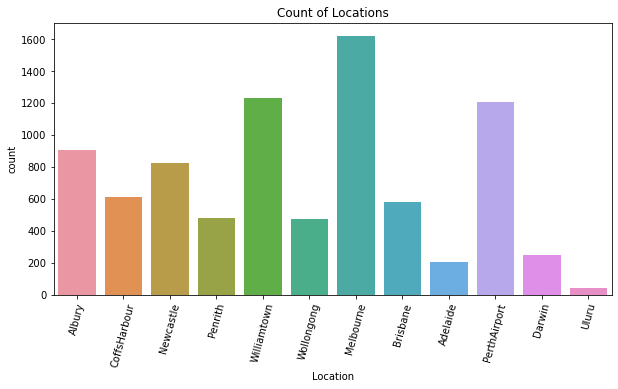

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=75)
plt.show()

- `highest rainfall in Melbourne, followed by Williamtown, Perth Airport, Albury and Newcastle`
- `lowest rainfall in Uluru, followed by Darwin and Adelaide`

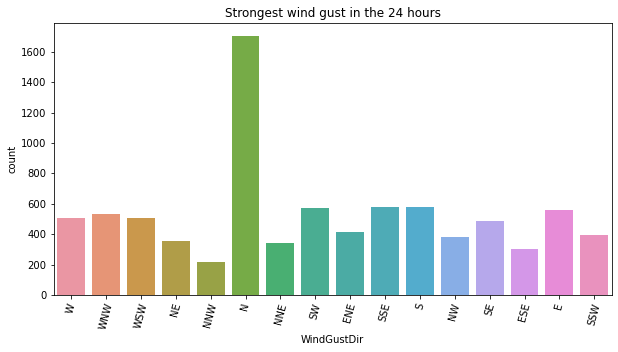

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(df["WindGustDir"])
plt.title("Strongest wind gust in the 24 hours")
plt.xticks(rotation=75)
plt.show()

`Strongest wind direction is N and the weakest is NNW`

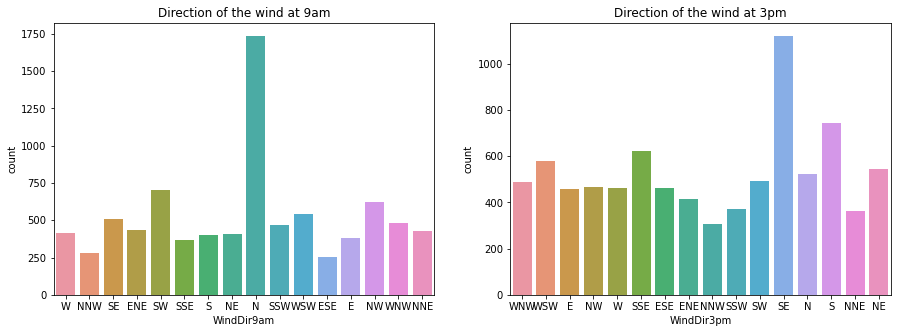

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'])
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'])
plt.show()

- `wind direction at 9 am strongest - N`
- `wind direction at 3 pm strongest - SE`

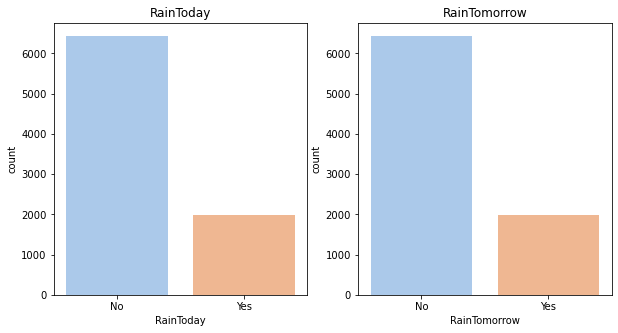

In [70]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='pastel')
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

`No significant comparable insights`

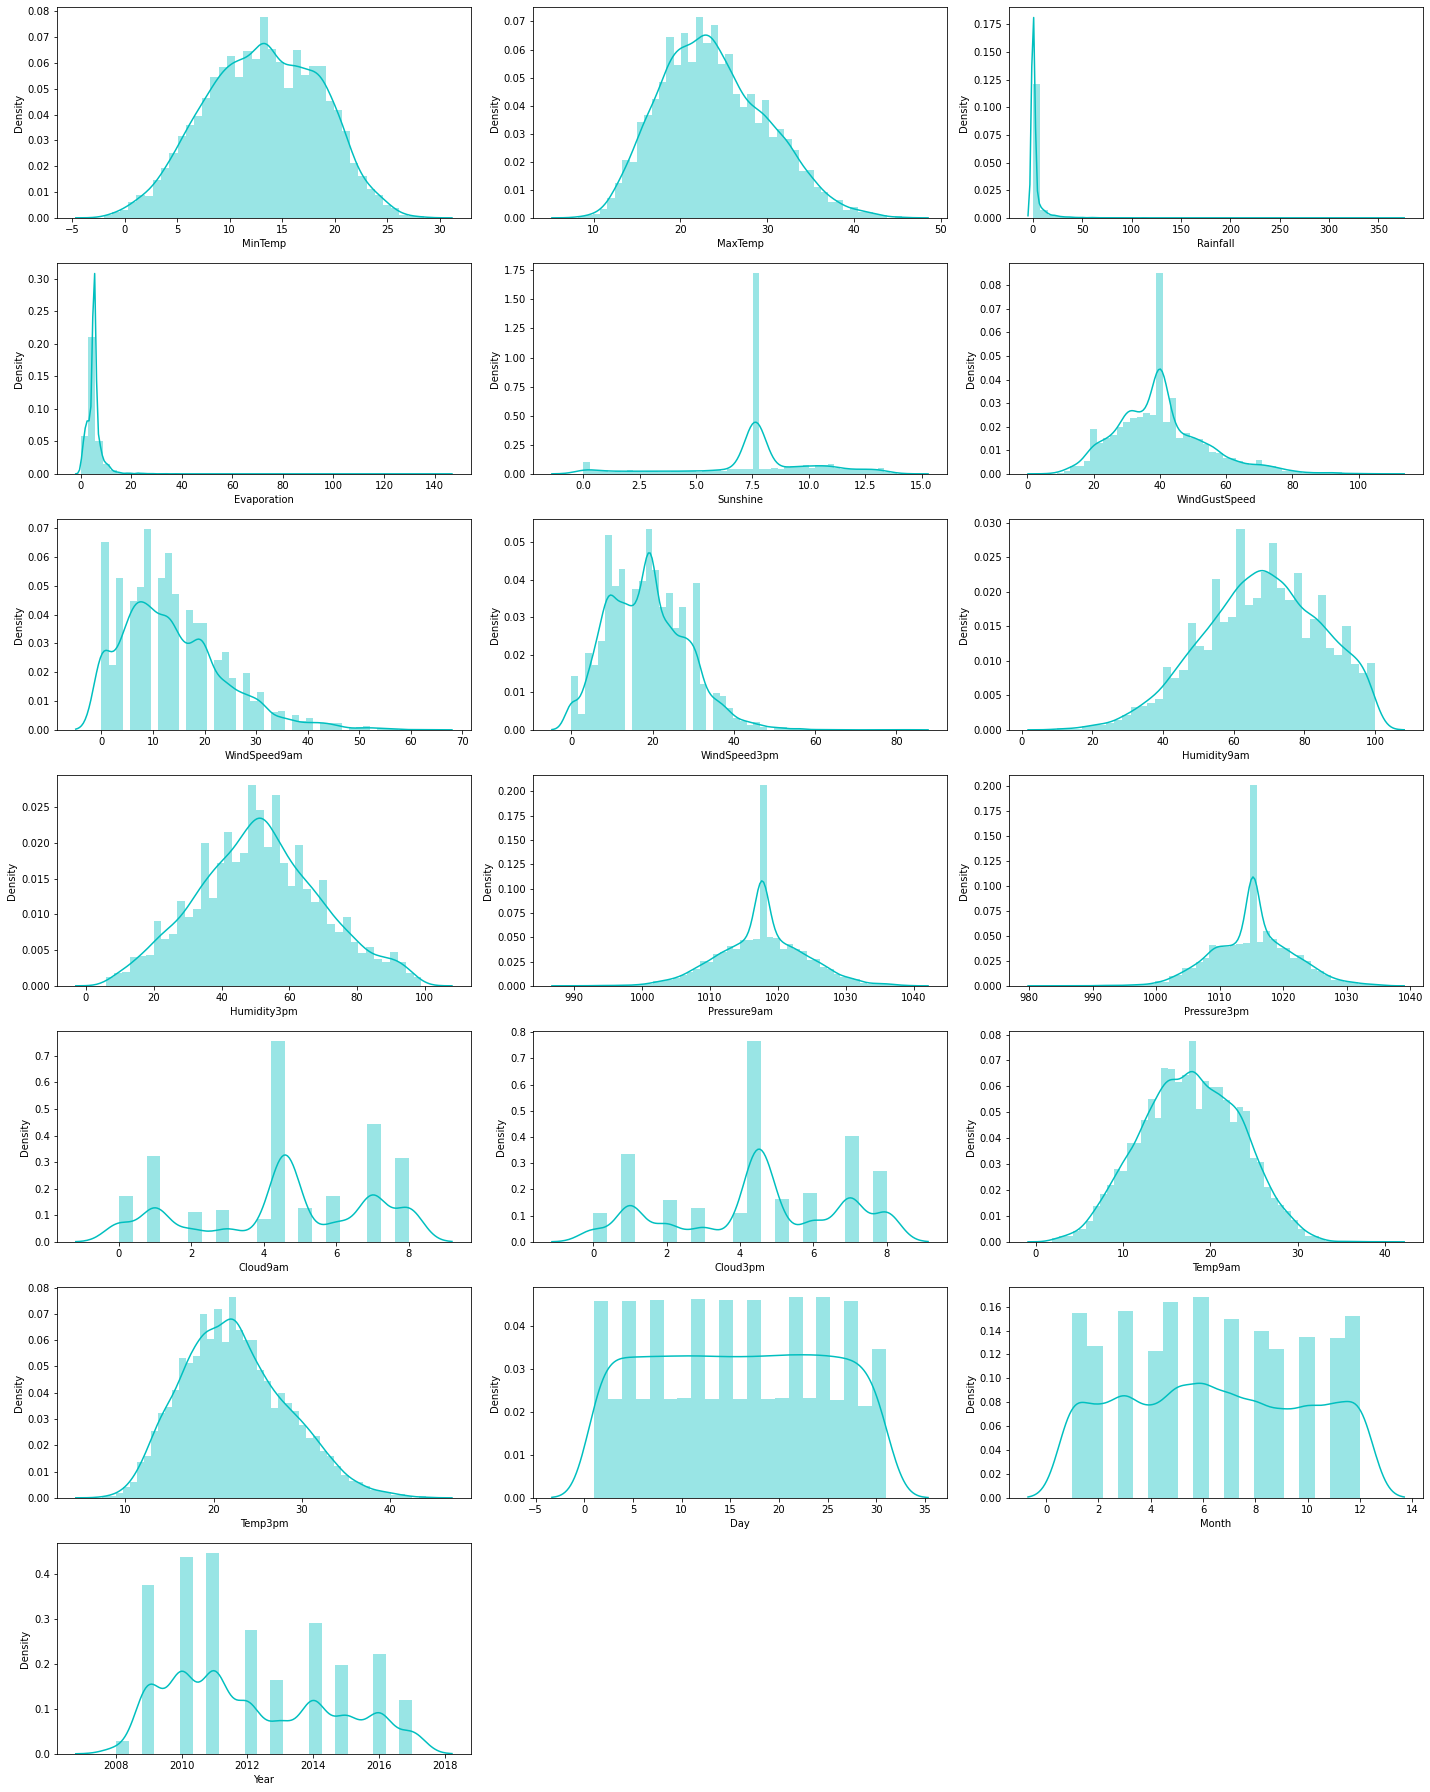

In [71]:
# distribution across numerical columns
plt.figure(figsize=(20,25))
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color="c")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

**Skewed to the right**
- max temp
- rainfall
- evaporation
- WindGustSpeed
- WindSpeed9am
- WindSpeed3pm

**Distribution not normal**
- Sunshine

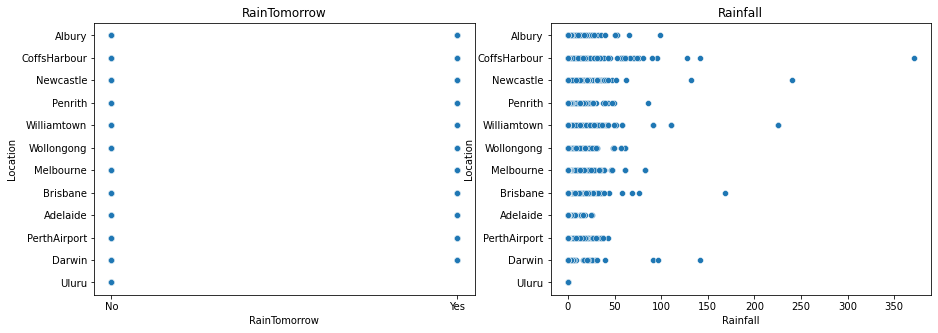

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

`Location does not have major impact on rainfall or whther it will rain tomorrow`

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

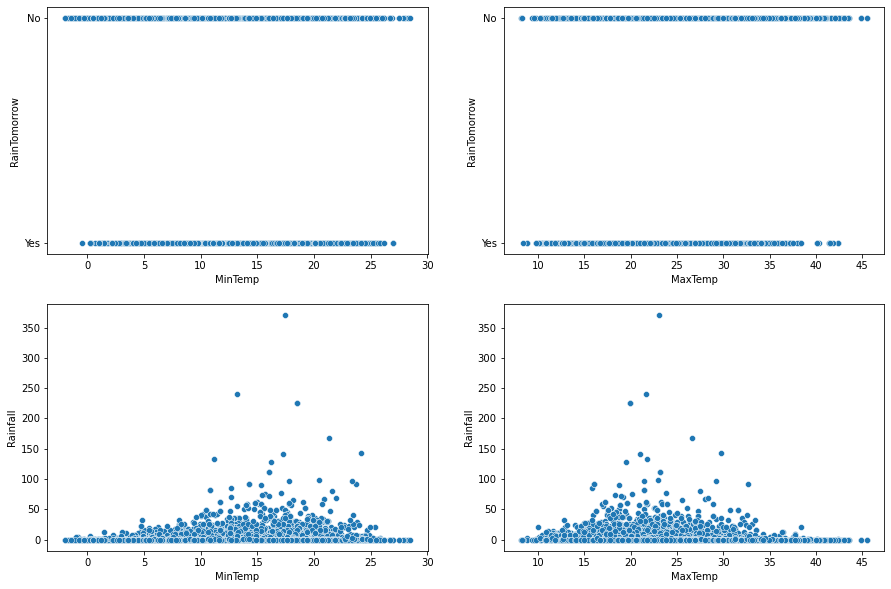

In [73]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],data=df)
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],data=df)
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],data=df)
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],data=df)

- `Temp (min and max) has no relation with RainTomorrow`
- `Some relation between temperature and rainfall`

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

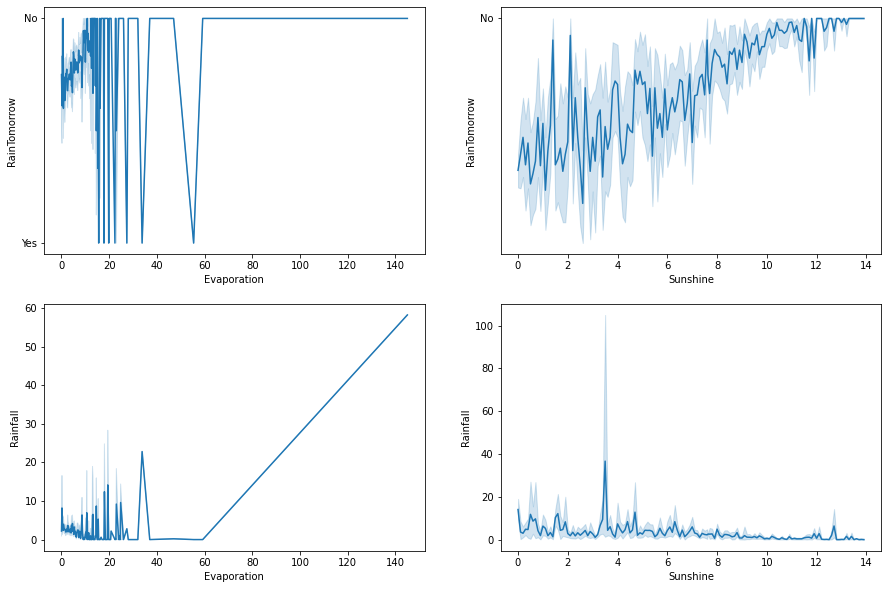

In [74]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],data=df)
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],data=df)
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],data=df)
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],data=df)

- `Evaporation has a strong relationship with whether it will rain tomorrow, as well as the amount of rainfall`
- `Lower sunshine -> possibility of rain tomorrow`
- `lower sunshine -> higher rain to some extent`

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

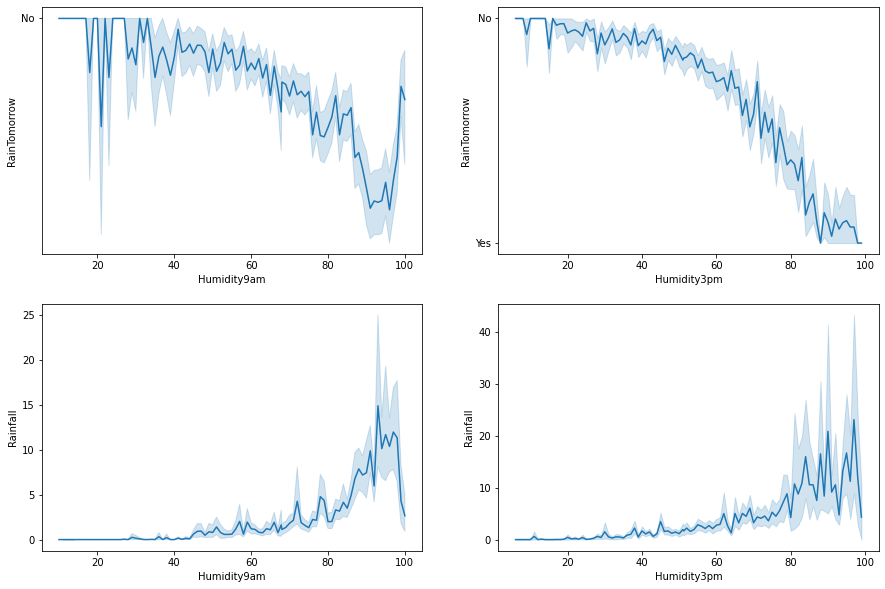

In [75]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],data=df)
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],data=df)
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],data=df)
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],data=df)

- `higher humidity -> more chance of rain tomorrow`
- `higher humidity -> more rainfall`

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

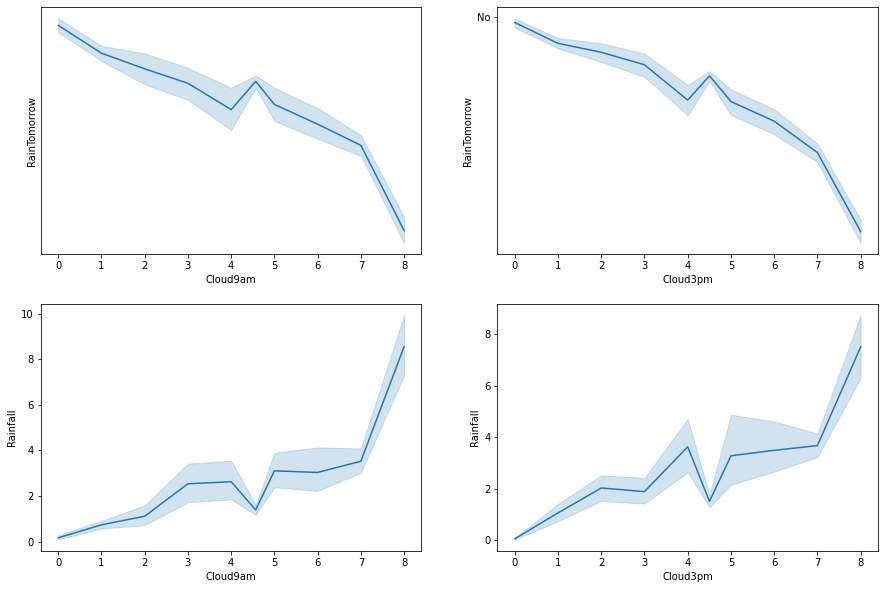

In [76]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],data=df)
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],data=df)
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],data=df)
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],data=df)

- `higher cloud coverage -> more chance of rain tomorrow`
- `higher cloud coverage -> more amount of rainfall`

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

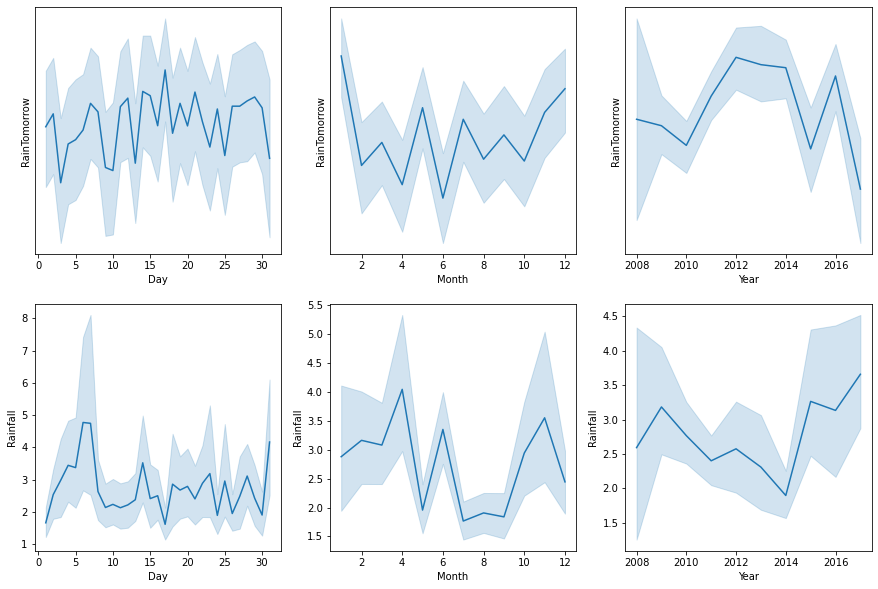

In [77]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0],data=df)
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1],data=df)
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2],data=df)

sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0],data=df)
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1],data=df)
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2],data=df)

`No linear relationship / trend is visible with the possibility of rain tomorrow or the amount of rainfall. It keeps varying. Higher rainfall in April, November and June`

## Outlier Check

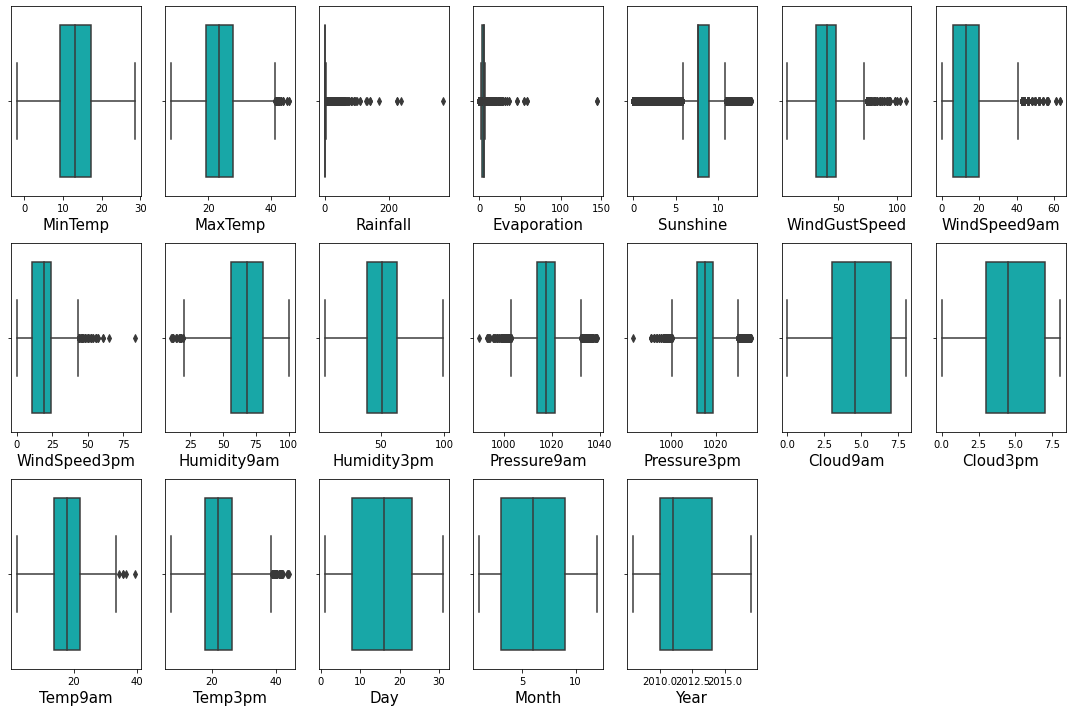

In [78]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(df[column],color="c")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

**Presence of outliers:**
- MaxTemp
- Rainfall (mainly because a lot of the data is 0)
- Evaporation (mainly because a lot of the data is 0)
- Sunshine
- WindGustSpeed
- WindSpeed9am
- WindSpeed3pm
- Humidity9am
- Pressure9am
- Pressure3pm
- Temp9am
- Temp3pm

In [79]:
feature = df[['MaxTemp',
              'Rainfall',
              'Evaporation',
              'Sunshine',
              'WindGustSpeed',
              'WindSpeed9am',
              'WindSpeed3pm',
              'Humidity9am',
              'Pressure9am',
              'Pressure3pm',
              'Temp9am',
              'Temp3pm']]

z=np.abs(zscore(feature))
z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.570089e-01,0.206021,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.584003,1.308665,0.153712,0.108138
1,2.028121e-01,0.264165,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.121880,1.196072,0.100217,0.312348
2,3.009450e-01,0.264165,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.599939,1.051309,0.577390,0.127334
3,6.771214e-01,0.264165,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,0.006411,0.391836,0.060269,0.682376
4,1.380408e+00,0.167258,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,1.090010,1.485596,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,7.523137e-02,0.264165,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.109058,0.814518,1.366273,0.007221
8421,2.355231e-01,0.264165,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,0.933770,0.621501,1.223619,0.345987
8422,4.972110e-01,0.264165,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,0.535388,0.251553,0.938310,0.615099
8423,5.135665e-01,0.264165,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,0.280424,0.203299,0.474684,0.598279


In [80]:
new_df = df[(z<3).all(axis=1)] 
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


In [81]:
print(df.shape)
print(new_df.shape)

(8425, 25)
(7987, 25)


In [82]:
loss = (8425-7987)/8425*100
loss

5.198813056379822

`Data loss is 5.19%, which is acceptable`

In [83]:
new_df.skew().sort_values()

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
Rainfall         3.519090
dtype: float64

`Skewness present in Sunshine, Rainfall, Evaporation, WindSpeed9am, WindGustSpeed`

In [84]:
new_df["Sunshine"] = np.cbrt(new_df["Sunshine"])
new_df["Rainfall"] = np.cbrt(new_df["Rainfall"])
new_df["Evaporation"] = np.cbrt(new_df["Evaporation"])
new_df["WindSpeed9am"] = np.cbrt(new_df["WindSpeed9am"])
new_df["WindGustSpeed"] = np.cbrt(new_df["WindGustSpeed"])

In [85]:
new_df.skew().sort_values()

Sunshine        -2.856050
WindSpeed9am    -1.274070
Evaporation     -0.967518
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
WindGustSpeed   -0.180704
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
Rainfall         1.473709
dtype: float64

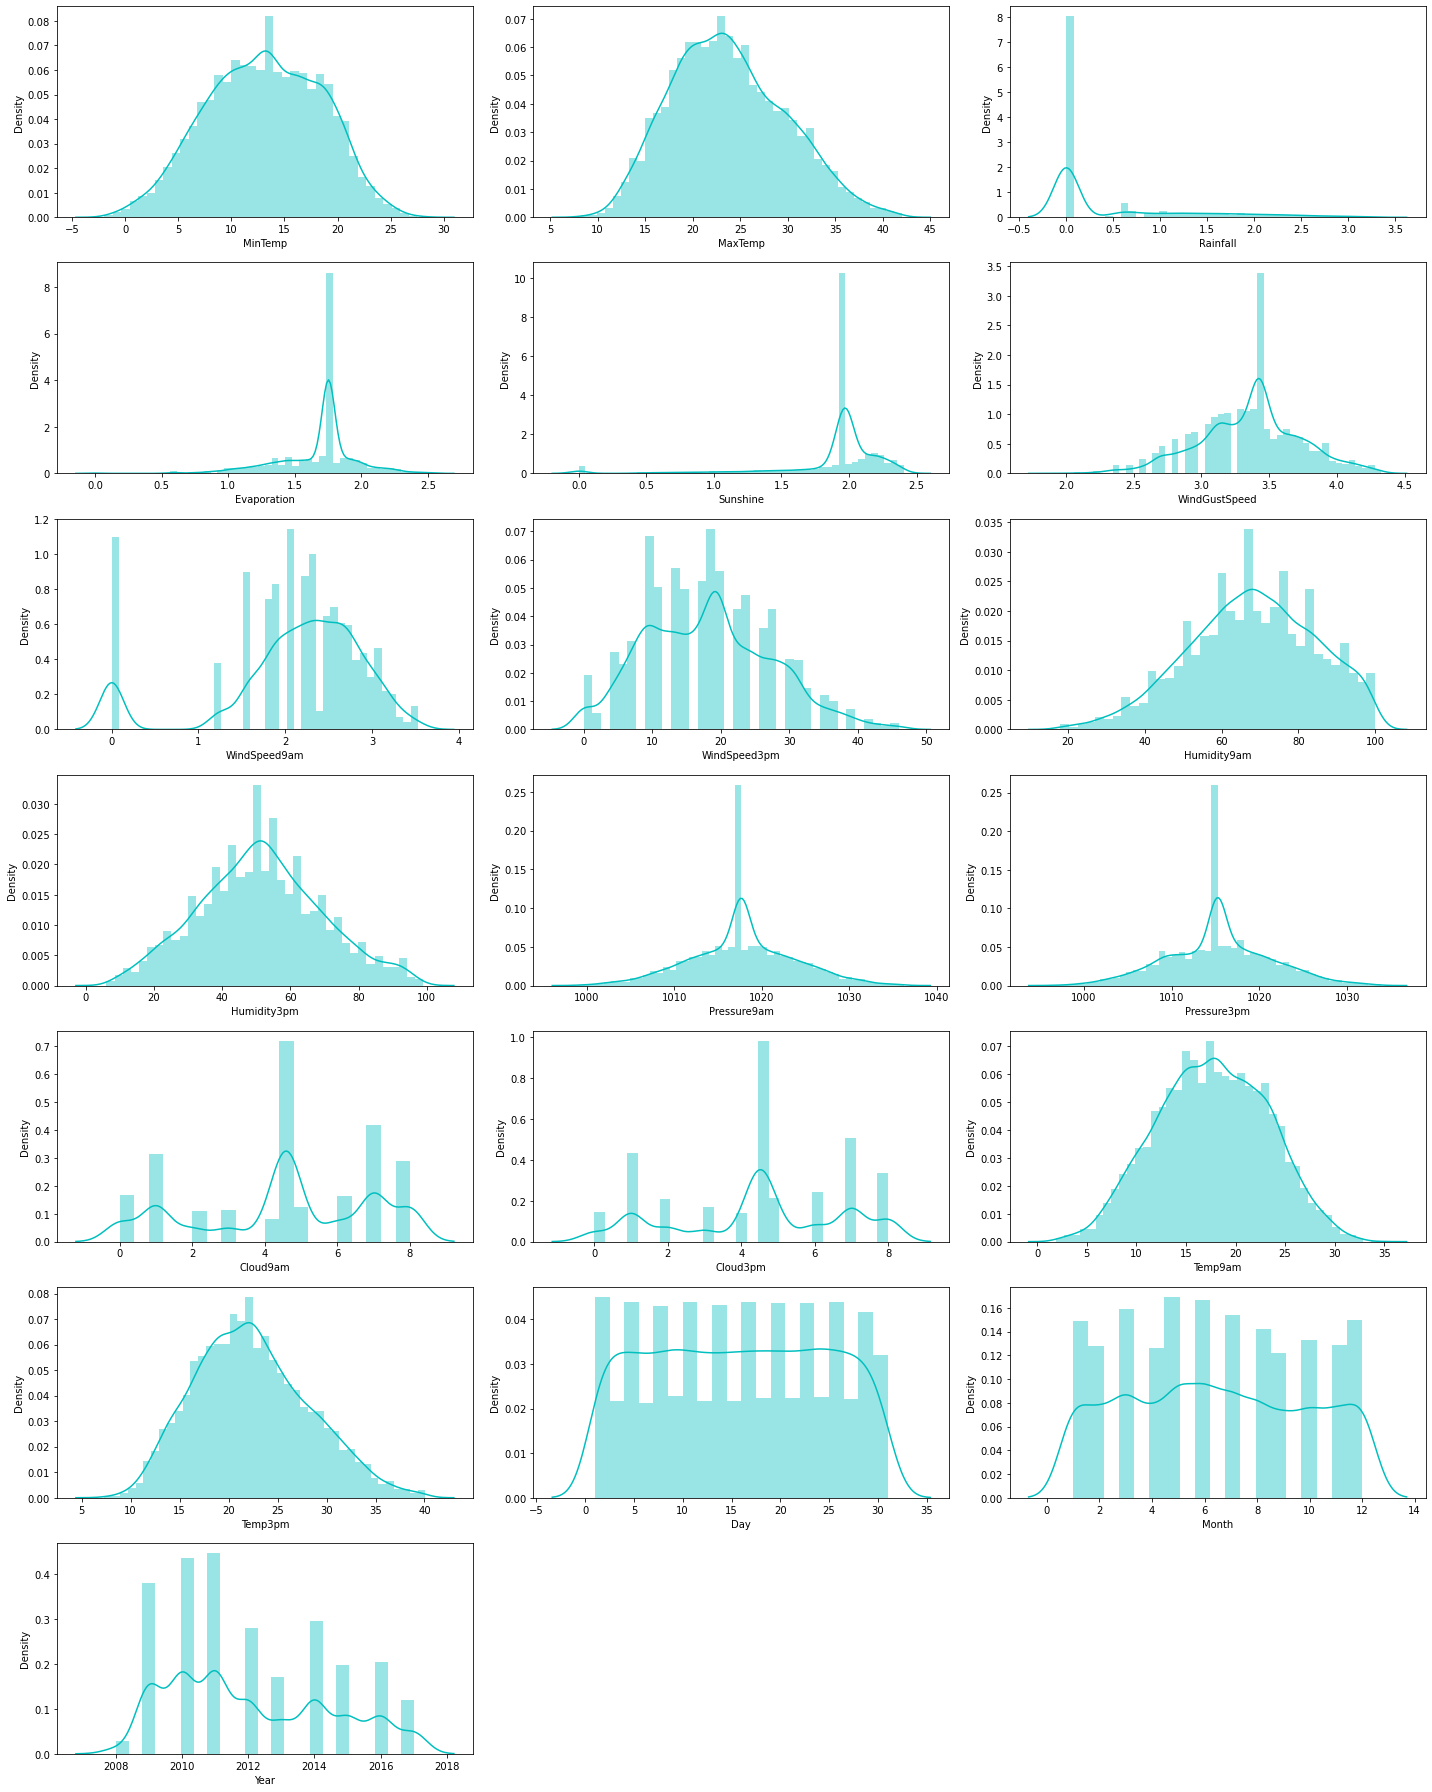

In [86]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(new_df[column],color="c")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

`most of the skewness has been removed`

## Encoding categorical data

In [87]:
le=LabelEncoder()
new_df[cat_col]= new_df[cat_col].apply(le.fit_transform)
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.843433,1.753261,1.968868,13,3.530348,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,1.753261,1.968868,14,3.530348,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,1.753261,1.968868,15,3.583048,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,1.753261,1.968868,4,2.884499,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,1.000000,1.753261,1.968868,13,3.448217,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.753261,1.968868,0,3.141381,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,1.753261,1.968868,6,2.802039,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,1.753261,1.968868,3,3.332222,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,1.753261,1.968868,9,3.036589,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


## Establishing correlation

In [88]:
corr=new_df.corr()
corr

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.013245,0.124033,0.066529,-0.037707,0.259483,-0.041030,-0.031195,...,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.073519,0.356089,0.006387,-0.154935,0.253762,-0.045231,-0.154184,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.229296,0.459432,0.310907,-0.237955,0.155754,-0.217160,-0.190417,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.013245,0.073519,-0.229296,1.000000,-0.169206,-0.208747,0.124172,0.080302,0.155484,0.113229,...,-0.031431,0.295058,0.259063,-0.094134,-0.239093,0.903292,0.322561,-0.018118,-0.006507,0.007964
Evaporation,0.124033,0.356089,0.459432,-0.169206,1.000000,0.338895,-0.116632,0.161445,-0.097850,-0.039123,...,-0.269824,-0.104188,-0.139438,0.425806,0.447148,-0.167423,-0.087385,0.010289,-0.048615,0.143626
Sunshine,0.066529,0.006387,0.310907,-0.208747,0.338895,1.000000,-0.071328,0.006968,-0.052916,-0.045615,...,-0.036453,-0.428790,-0.449945,0.177263,0.325496,-0.188645,-0.287585,0.000222,0.000896,0.106974
WindGustDir,-0.037707,-0.154935,-0.237955,0.124172,-0.116632,-0.071328,1.000000,-0.000287,0.405681,0.507292,...,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.259483,0.253762,0.155754,0.080302,0.161445,0.006968,-0.000287,1.000000,-0.063555,0.084416,...,-0.328938,0.005673,0.057338,0.225777,0.121450,0.075952,0.169135,-0.005673,0.047951,-0.021156
WindDir9am,-0.041030,-0.045231,-0.217160,0.155484,-0.097850,-0.052916,0.405681,-0.063555,1.000000,0.243622,...,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.113229,-0.039123,-0.045615,0.507292,0.084416,0.243622,1.000000,...,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


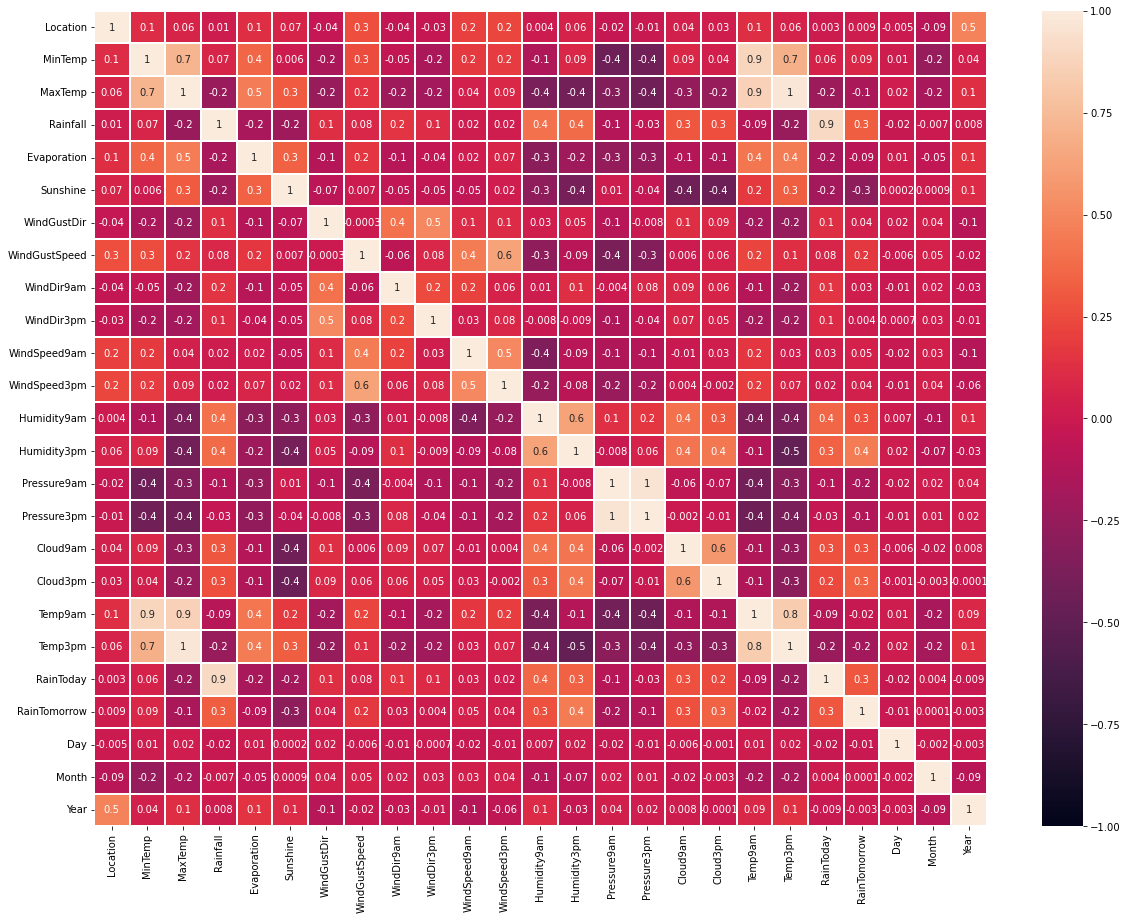

In [89]:
plt.figure(figsize=(20,15))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',annot=True,annot_kws={'size':10})
plt.yticks(rotation=0)
plt.show()

In [90]:
corr['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.445891
Cloud3pm         0.337922
Rainfall         0.322561
RainToday        0.294528
Humidity9am      0.269722
Cloud9am         0.269598
WindGustSpeed    0.169135
MinTemp          0.091021
WindSpeed9am     0.047118
WindGustDir      0.044378
WindSpeed3pm     0.042472
WindDir9am       0.027091
Location         0.009222
WindDir3pm       0.003674
Month            0.000135
Year            -0.003180
Day             -0.012493
Temp9am         -0.021459
Evaporation     -0.087385
Pressure3pm     -0.124953
MaxTemp         -0.149708
Pressure9am     -0.152692
Temp3pm         -0.191706
Sunshine        -0.287585
Name: RainTomorrow, dtype: float64

In [91]:
corr['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.903292
Humidity9am      0.400047
Humidity3pm      0.380798
RainTomorrow     0.322561
Cloud9am         0.295058
Cloud3pm         0.259063
WindDir9am       0.155484
WindGustDir      0.124172
WindDir3pm       0.113229
WindGustSpeed    0.080302
MinTemp          0.073519
WindSpeed3pm     0.020535
WindSpeed9am     0.015092
Location         0.013245
Year             0.007964
Month           -0.006507
Day             -0.018118
Pressure3pm     -0.031431
Temp9am         -0.094134
Pressure9am     -0.108021
Evaporation     -0.169206
Sunshine        -0.208747
MaxTemp         -0.229296
Temp3pm         -0.239093
Name: Rainfall, dtype: float64

`highest (positive and negative) and lowest (postive and negative) correlations are evident from the aforementioned outputs.`

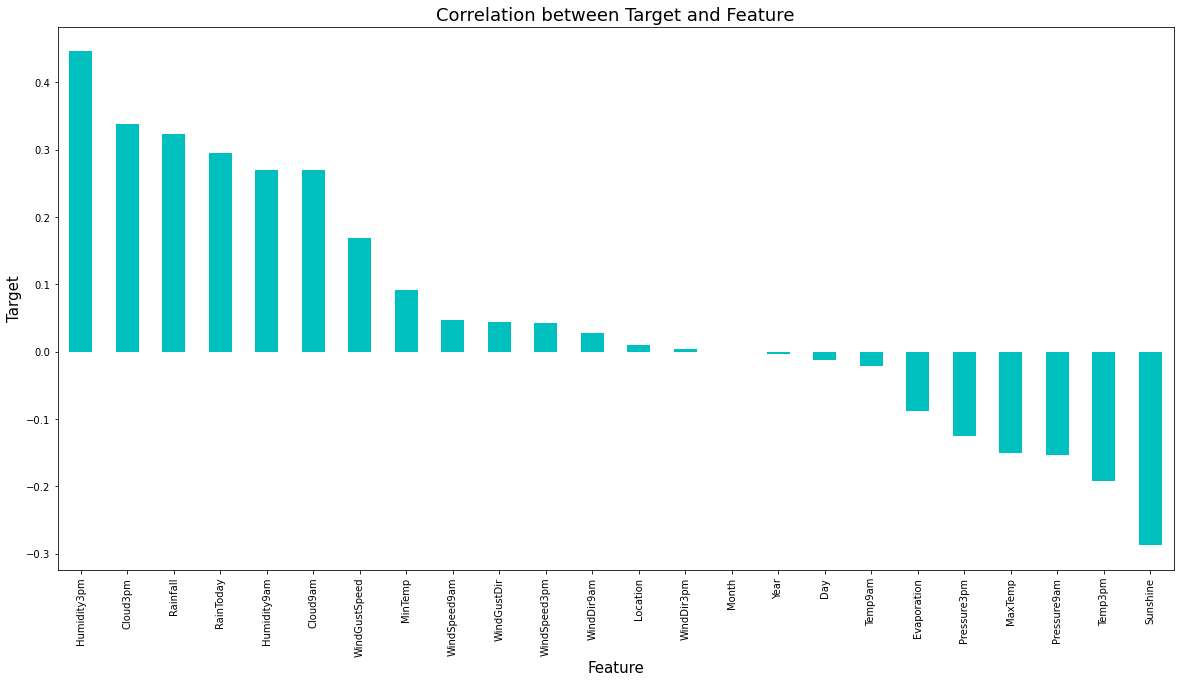

In [92]:
plt.figure(figsize=(20,10))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation between Target and Feature',fontsize=18)
plt.show()

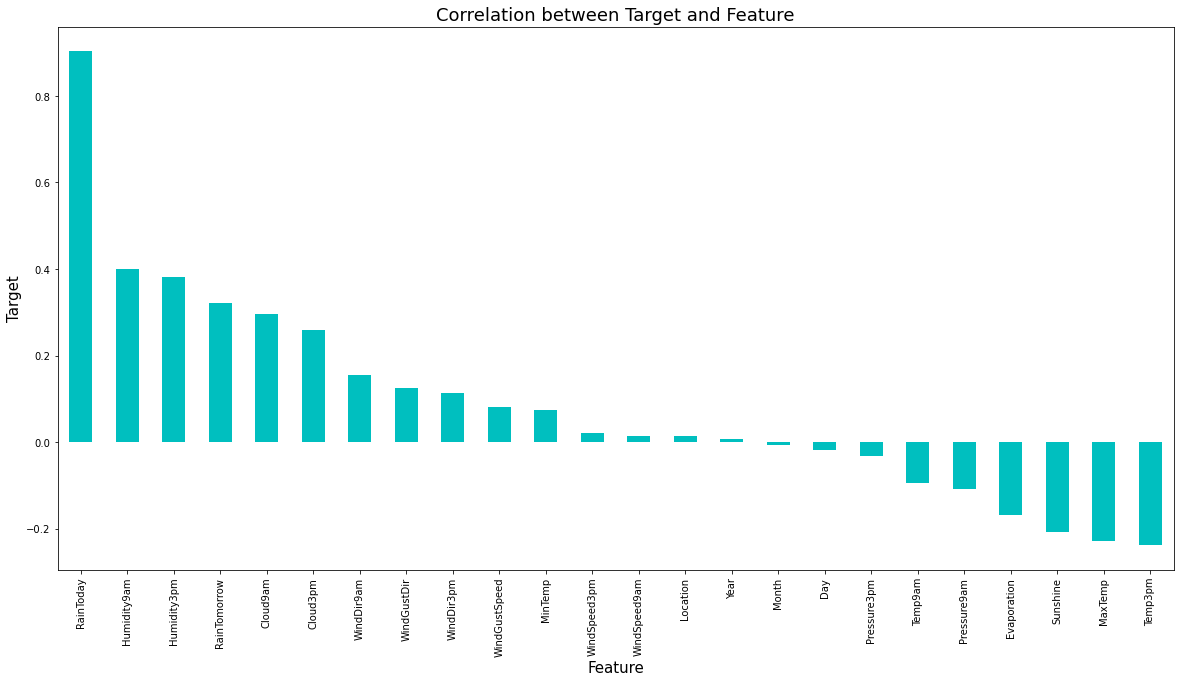

In [93]:
plt.figure(figsize=(20,10))
new_df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation between Target and Feature',fontsize=18)
plt.show()

## 1. Predicting whether or not it will RainTomorrow

In [94]:
x = new_df.drop("RainTomorrow", axis=1)
y = new_df["RainTomorrow"]

## Feature Scaling

In [95]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.432100,0.255563,0.153323,1.229267,0.453782,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.614634,0.255563,0.153323,1.441960,0.453782,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.614634,0.255563,0.153323,1.654654,0.594201,1.250245,1.626597,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.614634,0.255563,0.153323,-0.684977,-1.267099,0.377044,-1.769138,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.626406,0.255563,0.153323,1.229267,0.234941,-1.369358,-0.184462,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.614634,0.255563,0.153323,-1.535751,-0.582632,0.377044,-1.542755,...,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.614634,0.255563,0.153323,-0.259589,-1.486815,0.377044,-1.089991,...,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.614634,0.255563,0.153323,-0.897670,-0.074131,0.377044,1.400214,...,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.614634,0.255563,0.153323,0.378492,-0.861852,0.595344,-1.089991,...,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


`Bias removed using standard scaler`

## Multicollinearity Check (VIF)

In [96]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.585826,Location
1,8.742794,MinTemp
2,26.402605,MaxTemp
3,5.829876,Rainfall
4,1.491861,Evaporation
5,1.587987,Sunshine
6,1.620367,WindGustDir
7,2.191342,WindGustSpeed
8,1.407194,WindDir9am
9,1.493441,WindDir3pm


**High VIF**:
- MaxTemp
- Pressure9am
- Pressure3pm
- Temp9am
- Temp3pm

In [97]:
# dropping column with highest vif
x.drop("Temp3pm",axis=1,inplace=True)

In [98]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.584698,Location
1,8.704020,MinTemp
2,9.632907,MaxTemp
3,5.828166,Rainfall
4,1.490178,Evaporation
5,1.586647,Sunshine
6,1.617223,WindGustDir
7,2.183070,WindGustSpeed
8,1.406586,WindDir9am
9,1.492318,WindDir3pm


In [99]:
# dropping column with highest vif
x.drop("Pressure9am",axis=1,inplace=True)

In [100]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.584622,Location
1,8.558294,MinTemp
2,9.224295,MaxTemp
3,5.814426,Rainfall
4,1.478792,Evaporation
5,1.586401,Sunshine
6,1.602260,WindGustDir
7,2.162683,WindGustSpeed
8,1.382371,WindDir9am
9,1.426259,WindDir3pm


In [101]:
# dropping column with highest vif
x.drop("Temp9am",axis=1,inplace=True)

In [102]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.582849,Location
1,4.529095,MinTemp
2,5.354946,MaxTemp
3,5.806678,Rainfall
4,1.474422,Evaporation
5,1.582690,Sunshine
6,1.600354,WindGustDir
7,2.114963,WindGustSpeed
8,1.382178,WindDir9am
9,1.425890,WindDir3pm


`Multicollinearity has been removed`

## Data Imbalance

In [103]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

In [105]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [106]:
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

`Dataset has been balanced`

## Model Building

In [108]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=.20, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9505271695052717  on Random_state  17


In [109]:
x_train,x_test,y_train,y_test=TTS(x,y,test_size=.20,random_state=maxRS)

In [110]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr= LogisticRegression()
svc =  SVC()
knn = KNeighborsClassifier()

In [111]:
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)
lr.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsClassifier()

#### Decision Tree

In [112]:
dt_pred = dt.predict(x_test)
accu = classification_report(y_test,dt_pred)

In [113]:
cm = confusion_matrix(y_test,dt_pred)

In [114]:
cm

array([[1124,  160],
       [ 133, 1049]], dtype=int64)

In [115]:
print(accu)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1284
           1       0.87      0.89      0.88      1182

    accuracy                           0.88      2466
   macro avg       0.88      0.88      0.88      2466
weighted avg       0.88      0.88      0.88      2466



#### Logisitic Regression

In [116]:
lr_pred = lr.predict(x_test)
accu = classification_report(y_test,lr_pred)

In [117]:
cm = confusion_matrix(y_test,lr_pred)

In [118]:
cm

array([[1031,  253],
       [ 296,  886]], dtype=int64)

In [119]:
print(accu)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1284
           1       0.78      0.75      0.76      1182

    accuracy                           0.78      2466
   macro avg       0.78      0.78      0.78      2466
weighted avg       0.78      0.78      0.78      2466



#### Random Forest

In [120]:
rf_pred = rf.predict(x_test)
accu = classification_report(y_test,rf_pred)

In [121]:
cm = confusion_matrix(y_test,rf_pred)

In [122]:
cm

array([[1206,   78],
       [  67, 1115]], dtype=int64)

In [123]:
print(accu)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1284
           1       0.93      0.94      0.94      1182

    accuracy                           0.94      2466
   macro avg       0.94      0.94      0.94      2466
weighted avg       0.94      0.94      0.94      2466



#### SVC

In [124]:
svc_pred = svc.predict(x_test)
accu = classification_report(y_test,svc_pred)

In [125]:
cm = confusion_matrix(y_test,svc_pred)

In [126]:
cm

array([[1107,  177],
       [ 155, 1027]], dtype=int64)

In [127]:
print(accu)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1284
           1       0.85      0.87      0.86      1182

    accuracy                           0.87      2466
   macro avg       0.87      0.87      0.87      2466
weighted avg       0.87      0.87      0.87      2466



#### K Nearest Neighbor

In [128]:
knn_pred = knn.predict(x_test)
accu = classification_report(y_test,knn_pred)

In [129]:
cm = confusion_matrix(y_test,knn_pred)

In [130]:
cm

array([[ 997,  287],
       [  37, 1145]], dtype=int64)

In [131]:
print(accu)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1284
           1       0.80      0.97      0.88      1182

    accuracy                           0.87      2466
   macro avg       0.88      0.87      0.87      2466
weighted avg       0.89      0.87      0.87      2466



#### Model Cross Validation

In [132]:
print("Cross Validation Score for Decision Tree: ",cross_val_score(dt,x,y,cv=5).mean())
print("Cross Validation Score for Logistic Regression: ",cross_val_score(lr,x,y,cv=5).mean())
print("Cross Validation Score for Random Forest: ",cross_val_score(rf,x,y,cv=5).mean())
print("Cross Validation Score for SVC: ",cross_val_score(svc,x,y,cv=5).mean())
print("Cross Validation Score for KNN: ",cross_val_score(knn,x,y,cv=5).mean())

Cross Validation Score for Decision Tree:  0.7442011354420114
Cross Validation Score for Logistic Regression:  0.7133819951338201
Cross Validation Score for Random Forest:  0.7913219789132198
Cross Validation Score for SVC:  0.7370640713706408
Cross Validation Score for KNN:  0.7363341443633413


#### `Random Forest` appears to be the best model

#### ROC AUC Scores

In [133]:
print("ROC AUC Score for Decision Tree: ", roc_auc_score(y_test,dt_pred),"\n")
print("ROC AUC Score for Logistic Regression: ", roc_auc_score(y_test,lr_pred),"\n")
print("ROC AUC Score for Random Forest: ", roc_auc_score(y_test,rf_pred),"\n")
print("ROC AUC Score for SVC: ", roc_auc_score(y_test,svc_pred),"\n")
print("ROC AUC Score for KNN: ", roc_auc_score(y_test,knn_pred))

ROC AUC Score for Decision Tree:  0.881434128753736 

ROC AUC Score for Logistic Regression:  0.7762682448566504 

ROC AUC Score for Random Forest:  0.9412843746540792 

ROC AUC Score for SVC:  0.8655079304837359 

ROC AUC Score for KNN:  0.8725884371491374


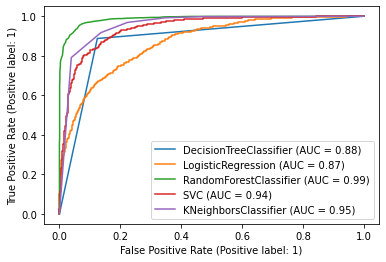

In [134]:
disp = plot_roc_curve(dt,x_test,y_test)
mod = [lr,rf,svc,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

#### `Random Forest` is the best model

## Hyperparameter Tuning

In [135]:
parameter = {'n_estimators':[30,50],
             'max_depth': [10,20,30],
             'min_samples_leaf':[3,5,10],
             'min_samples_split':[2,5,10],
             'criterion':['gini','entropy'],
             'max_features':["auto","sqrt"]
            }

In [136]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)

In [137]:
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 50]})

In [138]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 50}

In [139]:
Best_mod = RandomForestClassifier(n_estimators = 50,
                                   criterion = 'entropy', 
                                   max_depth= 30, 
                                   max_features = 'auto', 
                                   min_samples_leaf = 3, 
                                   min_samples_split = 5)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

93.39010543390106


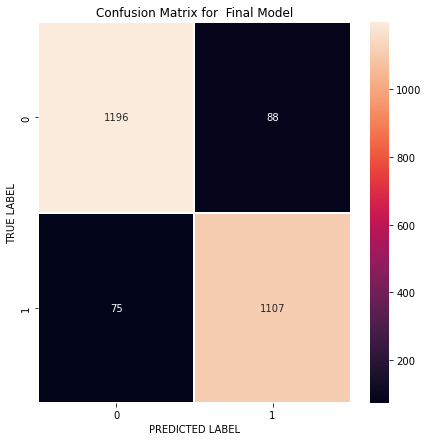

In [140]:
cm = confusion_matrix(y_test,rfpred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

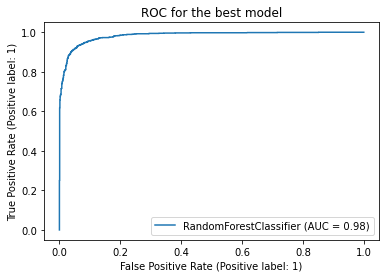

In [141]:
plot_roc_curve(Best_mod, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

## Saving the model and reloading to predict

In [142]:
joblib.dump(Best_mod,"Rainfall_Prediction_Weather_Forecasting.pkl")

['Rainfall_Prediction_Weather_Forecasting.pkl']

In [143]:
model = joblib.load("Rainfall_Prediction_Weather_Forecasting.pkl")

prediction = model.predict(x_test)
prediction

array([0, 1, 1, ..., 0, 0, 1])

In [144]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
2461,1,1
2462,0,0
2463,0,0
2464,0,0


## 2. Predicting how much rainfall could be there

In [145]:
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.843433,1.753261,1.968868,13,3.530348,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.000000,1.753261,1.968868,14,3.530348,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.000000,1.753261,1.968868,15,3.583048,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.000000,1.753261,1.968868,4,2.884499,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.000000,1.753261,1.968868,13,3.448217,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [146]:
x = new_df.drop("Rainfall", axis=1)
y = new_df["Rainfall"]

In [147]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.255563,0.153323,1.229267,0.453782,1.250245,1.400214,0.707154,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.255563,0.153323,1.441960,0.453782,-0.277857,1.626597,-0.647365,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.255563,0.153323,1.654654,0.594201,1.250245,1.626597,0.651849,...,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.255563,0.153323,-0.684977,-1.267099,0.377044,-1.769138,0.117716,...,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.255563,0.153323,1.229267,0.234941,-1.369358,-0.184462,-0.256122,...,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,0.255563,0.153323,-1.535751,-0.582632,0.377044,-1.542755,0.270778,...,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,0.255563,0.153323,-0.259589,-1.486815,0.377044,-1.089991,0.270778,...,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,0.255563,0.153323,-0.897670,-0.074131,0.377044,1.400214,-0.055228,...,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,0.255563,0.153323,0.378492,-0.861852,0.595344,-1.089991,0.270778,...,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635,0.942990,-0.123726,2.004134


In [148]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.596634,Location
1,8.753144,MinTemp
2,26.373771,MaxTemp
3,1.491817,Evaporation
4,1.599909,Sunshine
5,1.622692,WindGustDir
6,2.257110,WindGustSpeed
7,1.405987,WindDir9am
8,1.493746,WindDir3pm
9,1.793315,WindSpeed9am


In [149]:
# dropping column with highest vif
x.drop("Temp3pm",axis=1,inplace=True)

In [150]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.595523,Location
1,8.713998,MinTemp
2,9.630578,MaxTemp
3,1.490158,Evaporation
4,1.598570,Sunshine
5,1.619525,WindGustDir
6,2.249103,WindGustSpeed
7,1.405411,WindDir9am
8,1.492669,WindDir3pm
9,1.792901,WindSpeed9am


In [151]:
# dropping column with highest vif
x.drop("Pressure9am",axis=1,inplace=True)

In [152]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.595513,Location
1,8.570207,MinTemp
2,9.220860,MaxTemp
3,1.478784,Evaporation
4,1.598138,Sunshine
5,1.604135,WindGustDir
6,2.223570,WindGustSpeed
7,1.380847,WindDir9am
8,1.426636,WindDir3pm
9,1.783871,WindSpeed9am


In [153]:
# dropping column with highest vif
x.drop("Temp9am",axis=1,inplace=True)

In [154]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.593892,Location
1,4.532033,MinTemp
2,5.364756,MaxTemp
3,1.474373,Evaporation
4,1.594596,Sunshine
5,1.602198,WindGustDir
6,2.178745,WindGustSpeed
7,1.380614,WindDir9am
8,1.426312,WindDir3pm
9,1.775105,WindSpeed9am


## Model Building

In [155]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=.20, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8890010844437332  on Random_state  20


In [156]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.20,random_state=maxRS)

In [157]:
lr = LinearRegression()
rf = RandomForestRegressor()
svr = SVR()
dt = DecisionTreeRegressor()

In [158]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
svr.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [159]:
print("-"*50)
print("Linear Regression Model")
print("-"*50)
lr_pred = lr.predict(x_test)
print("R2 Score: ", r2_score(y_test,lr_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,lr_pred), "\n"*2)

print("-"*50)
print("Random Forest Model")
print("-"*50)
rf_pred = rf.predict(x_test)
print("R2 Score: ", r2_score(y_test,rf_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,rf_pred), "\n"*2)

print("-"*50)
print("Support Vector Regression Model")
print("-"*50)
svr_pred = svr.predict(x_test)
print("R2 Score: ", r2_score(y_test,svr_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,svr_pred), "\n"*2)

print("-"*50)
print("Decision Tree Model")
print("-"*50)
dt_pred = dt.predict(x_test)
print("R2 Score: ", r2_score(y_test,dt_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,dt_pred), "\n"*2)

--------------------------------------------------
Linear Regression Model
--------------------------------------------------
R2 Score:  0.8295730243365483 

Mean Squared Error:  0.11108025947816635 


--------------------------------------------------
Random Forest Model
--------------------------------------------------
R2 Score:  0.8869741132780258 

Mean Squared Error:  0.07366759150628502 


--------------------------------------------------
Support Vector Regression Model
--------------------------------------------------
R2 Score:  0.8491103399256501 

Mean Squared Error:  0.0983463006861624 


--------------------------------------------------
Decision Tree Model
--------------------------------------------------
R2 Score:  0.8009349987232964 

Mean Squared Error:  0.1297458451560127 




#### Model Cross Validation

In [162]:
print("Cross Validation Score for Linear Regression Model: ", cross_val_score(lr,x,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Random Forest Model: ", cross_val_score(rf,x,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Support Vector Regression Model: ", cross_val_score(svr,x,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Decision Tree Model: ", cross_val_score(dt,x,y,cv=5).mean(), "\n"*2)

Cross Validation Score for Linear Regression Model:  0.8255025047161727 


Cross Validation Score for Random Forest Model:  0.8557148779788573 


Cross Validation Score for Support Vector Regression Model:  0.820746121507355 


Cross Validation Score for Decision Tree Model:  0.7319790551800004 




#### `Random Forest` appears to be the best model

## Hyperparameter Tuning

In [166]:
parameters = {'n_estimators':[10,50,100],
              'max_depth':[10,20,30],
              'max_features':['auto','sqrt'],
              'min_samples_leaf': [2, 3, 5],
              'min_samples_split': [2, 3, 5, 10]
             }

In [167]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [168]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [169]:
GCV.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [170]:
Final_model = RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=100)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 88.34766277310622
RMSE value: 0.27558514040207027
MAE: 0.17766771263605682
MSE: 0.07594716961042879


`Post hyperparameter tuning, the r2 score is 88.35%`

## Saving the model and reloading for prediction

In [171]:
joblib.dump(Final_model,'Rainfall_Prediction_Weather_Forecasting_(Rainfall).pkl')

['Rainfall_Prediction_Weather_Forecasting_(Rainfall).pkl']

In [173]:
Model = joblib.load("Rainfall_Prediction_Weather_Forecasting_(Rainfall).pkl")

a = np.array(y_test)
predicted = np.array(Model.predict(x_test))
df_RainfallPred = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_RainfallPred

,Original,Predicted
0,2.154435,1.913494
1,0.000000,0.067560
2,0.000000,0.056177
3,0.000000,0.045612
4,0.000000,0.208197
...,...,...
1593,0.000000,0.014307
1594,1.948695,1.862650
1595,1.473613,1.640593
1596,0.000000,0.000000


In [174]:
df_RainfallPred.head(50)

,Original,Predicted
0,2.154435,1.913494
1,0.000000,0.067560
2,0.000000,0.056177
3,0.000000,0.045612
4,0.000000,0.208197
5,0.000000,0.116998
6,0.000000,0.136023
7,0.000000,0.034466
8,2.223980,1.868250
9,0.000000,0.072774


# `END`